In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df1 = pd.read_csv('/content/sample_data/california_housing_train.csv')
df2 = pd.read_csv('/content/sample_data/california_housing_test.csv')
frames = [df1,df2]
df = pd.concat(frames)

In [ ]:
len(df)

20000

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


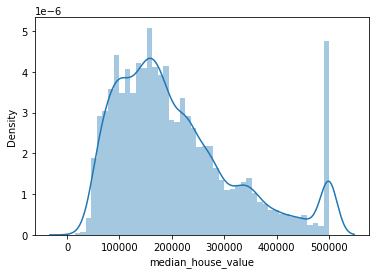

In [ ]:
sns.distplot(df['median_house_value'])

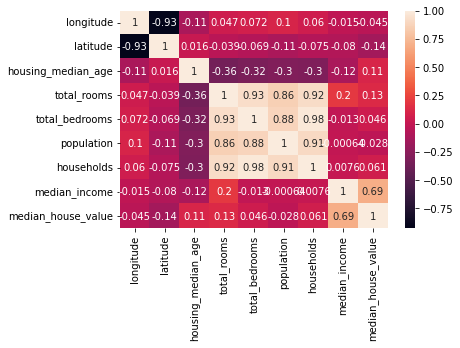

In [ ]:
sns.heatmap(df.corr(),annot = True)

#this corr map is used to find the correlation between the attributes and the pricing so as to 
#get an idea about the relationship between them.

In [ ]:
df.columns 

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [ ]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']]
#separate the other attributes from the predicting attribute

In [ ]:
y = df[['median_house_value']]
#separte the predicting attribute into Y for model training 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
#loading the model constructor

In [ ]:
lm.fit(x_train,y_train)
#training or fitting the train data into the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)

[-3669728.38500832]


In [ ]:
lm.coef_
#examining the co-efficients of the fitted model.

array([[-4.34875694e+04, -4.27272576e+04,  1.17360025e+03,
        -8.78626031e+00,  1.14144278e+02, -3.51408953e+01,
         4.35595638e+01,  4.02484503e+04]])

In [ ]:
x_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [ ]:
cdf = pd.DataFrame(data=lm.coef_.reshape(8,1),index=x_train.columns,columns=['Coeff'])

In [ ]:
cdf

,Coeff
longitude,-43487.569377
latitude,-42727.257631
housing_median_age,1173.600248
total_rooms,-8.786260
total_bedrooms,114.144278
population,-35.140895
households,43.559564
median_income,40248.450258


In [ ]:
predictions = lm.predict(x_test)

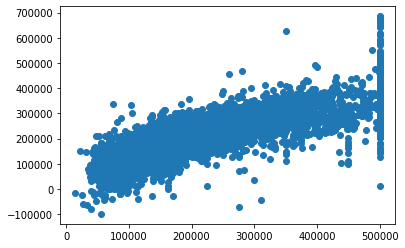

In [ ]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !! almost it is forming a linear line with less deviation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


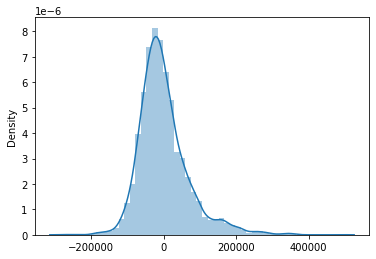

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics
import math

In [ ]:
math.sqrt(metrics.mean_squared_error(y_test,predictions))
#printing the error values of the model 

69311.30267453249

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 50336.26298648616
MSE: 4804056678.440655
RMSE: 69311.30267453249
